# Com o dataset com a target feita pelo modelo KMeans

Testar o dataset com modelos de classificação para validar o modelo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 19.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier 
import scikitplot as skplt
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, KFold,RepeatedKFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold

import shap

import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Smart_Locator/datasets/CNPJ_metadados/new_dataset11.csv')
df1.head()

,cnpj,cnae,capital_social,porte,secao,divisao,grupo,classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,secao1,divisao1,grupo1,classe1,secao2,divisao2,grupo2,classe2,secao3,divisao3,grupo3,classe3,secao4,divisao4,grupo4,classe4,secao5,divisao5,grupo5,classe5,target
0,40.223.835/0001-25,4771701,90000.0,1,7,47,477,47717,762,4721104,4723700,4729699,4761002,4771703,7,47,472,47211,7,47,472,47237,7,47,472,47296,7,47,476,47610,7,47,477,47717,1
1,05.010.690/0001-83,4771701,0.0,1,7,47,477,47717,7600,4771701,4771701,4771701,4771701,4771701,7,47,477,47717,7,47,477,47717,7,47,477,47717,7,47,477,47717,7,47,477,47717,1
2,05.166.298/0001-28,4771701,40000.0,1,7,47,477,47717,7509,4772500,4771701,4771701,4771701,4771701,7,47,477,47725,7,47,477,47717,7,47,477,47717,7,47,477,47717,7,47,477,47717,1
3,02.633.061/0001-11,4771701,45000.0,3,7,47,477,47717,8964,4761003,4772500,4721104,4729699,4619200,7,47,476,47610,7,47,477,47725,7,47,472,47211,7,47,472,47296,7,46,461,46192,1
4,18.120.089/0001-95,4771701,5000.0,1,7,47,477,47717,14448,4771701,4771701,4771701,4771701,4771701,7,47,477,47717,7,47,477,47717,7,47,477,47717,7,47,477,47717,7,47,477,47717,1


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Smart_Locator/datasets/CNPJ_metadados/new_dataset12.csv')
df2.head()

,cnpj,cnae,capital_social,porte,secao,divisao,grupo,classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,secao1,divisao1,grupo1,classe1,secao2,divisao2,grupo2,classe2,secao3,divisao3,grupo3,classe3,secao4,divisao4,grupo4,classe4,secao5,divisao5,grupo5,classe5,target
0,33.105.314/0001-08,4712100,120000.0,3,7,47,471,47121,1412,1099604,4721102,4721103,4722901,4722902,3,10,109,10996,7,47,472,47211,7,47,472,47211,7,47,472,47229,7,47,472,47229,1
1,37.645.641/0001-03,4771701,200000.0,1,7,47,477,47717,938,4721104,4723700,4761002,4771703,4772500,7,47,472,47211,7,47,472,47237,7,47,476,47610,7,47,477,47717,7,47,477,47725,1
2,10.545.047/0003-56,4771701,250000.0,3,7,47,477,47717,260,4712100,4729602,4772500,4789005,4771701,7,47,471,47121,7,47,472,47296,7,47,477,47725,7,47,478,47890,7,47,477,47717,1
3,02.579.089/0001-18,4771701,10000.0,1,7,47,477,47717,9003,4772500,4771701,4771701,4771701,4771701,7,47,477,47725,7,47,477,47717,7,47,477,47717,7,47,477,47717,7,47,477,47717,1
4,17.571.100/0001-70,4771701,20000.0,1,7,47,477,47717,14786,4772500,4761003,4729699,4721104,4771701,7,47,477,47725,7,47,476,47610,7,47,472,47296,7,47,472,47211,7,47,477,47717,1


In [ ]:
df1.shape

(5795950, 35)

In [ ]:
df2.shape

(5795949, 35)

## Amostra Simples

In [ ]:
df_target11 = df1.loc[(df1['target'] == 1)]
df_target11.reset_index(inplace=True)
df_target11.drop(columns=['index'], inplace=True)
df_target11 = df_target11.loc[0:int(11585/2), :]
df_target11.shape


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(5793, 35)

In [ ]:
df_target11.target.value_counts()

1    5793
Name: target, dtype: int64

In [ ]:
df_target01 = df1.loc[(df1['target'] == 0)]
df_target01.reset_index(inplace=True)
df_target01.drop(columns=['index'], inplace=True)
df_target01 = df_target01.loc[0:int(11585/2), :]
df_target01.shape

(5793, 35)

In [ ]:
base_treinamento = pd.concat([df_target11, df_target01])
base_treinamento.shape

(11586, 35)

In [ ]:
base_treinamento.target.value_counts()

1    5793
0    5793
Name: target, dtype: int64

In [ ]:
y_train = base_treinamento['target']
X_train = base_treinamento[base_treinamento.columns.difference(['cnpj','target'])]

In [ ]:
df2.shape

(5795949, 35)

In [ ]:
df_target12 = df2.loc[(df2['target'] == 1)]
df_target12.reset_index(inplace=True)
df_target12.drop(columns=['index'], inplace=True)
df_target12 = df_target12.loc[0:int(4965/2), :]
df_target12.shape


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(2483, 35)

In [ ]:
df_target12.target.value_counts()

1    2483
Name: target, dtype: int64

In [ ]:
df_target02 = df2.loc[(df2['target'] == 0)]
df_target02.reset_index(inplace=True)
df_target02.drop(columns=['index'], inplace=True)
df_target02 = df_target02.loc[0:int(4965/2), :]
df_target02.shape

(2483, 35)

In [ ]:
base_teste = pd.concat([df_target12, df_target02])
base_teste.shape

(4966, 35)

In [ ]:
base_teste.target.value_counts()

1    2483
0    2483
Name: target, dtype: int64

In [ ]:
y_test = base_teste['target']
X_test = base_teste[base_teste.columns.difference(['cnpj','target'])]

## Análise dos dados

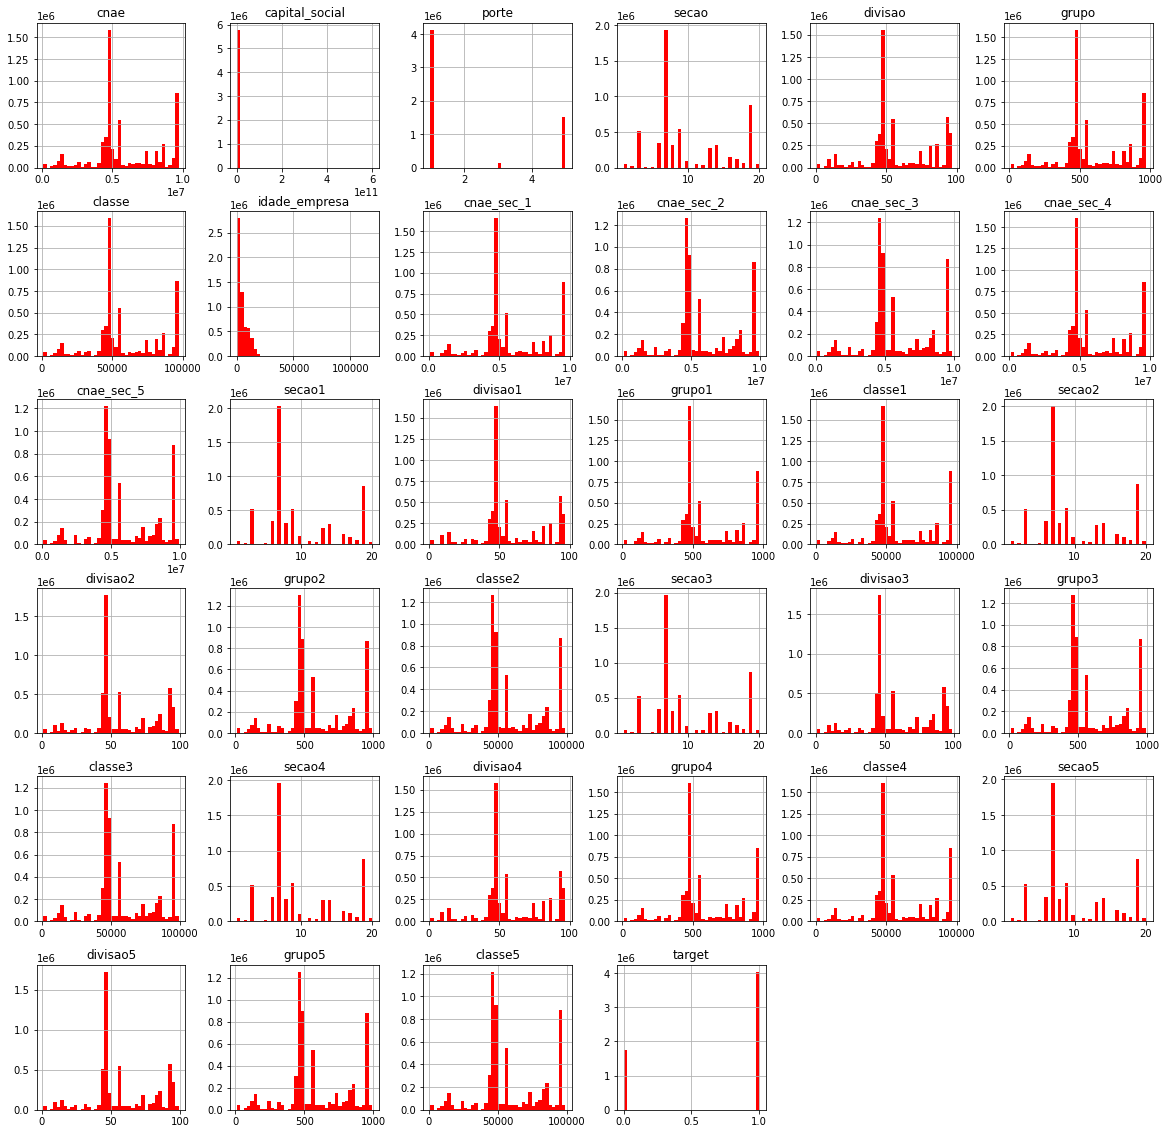

In [ ]:
df1.hist(bins = 40, figsize=(20,20), color = 'r');

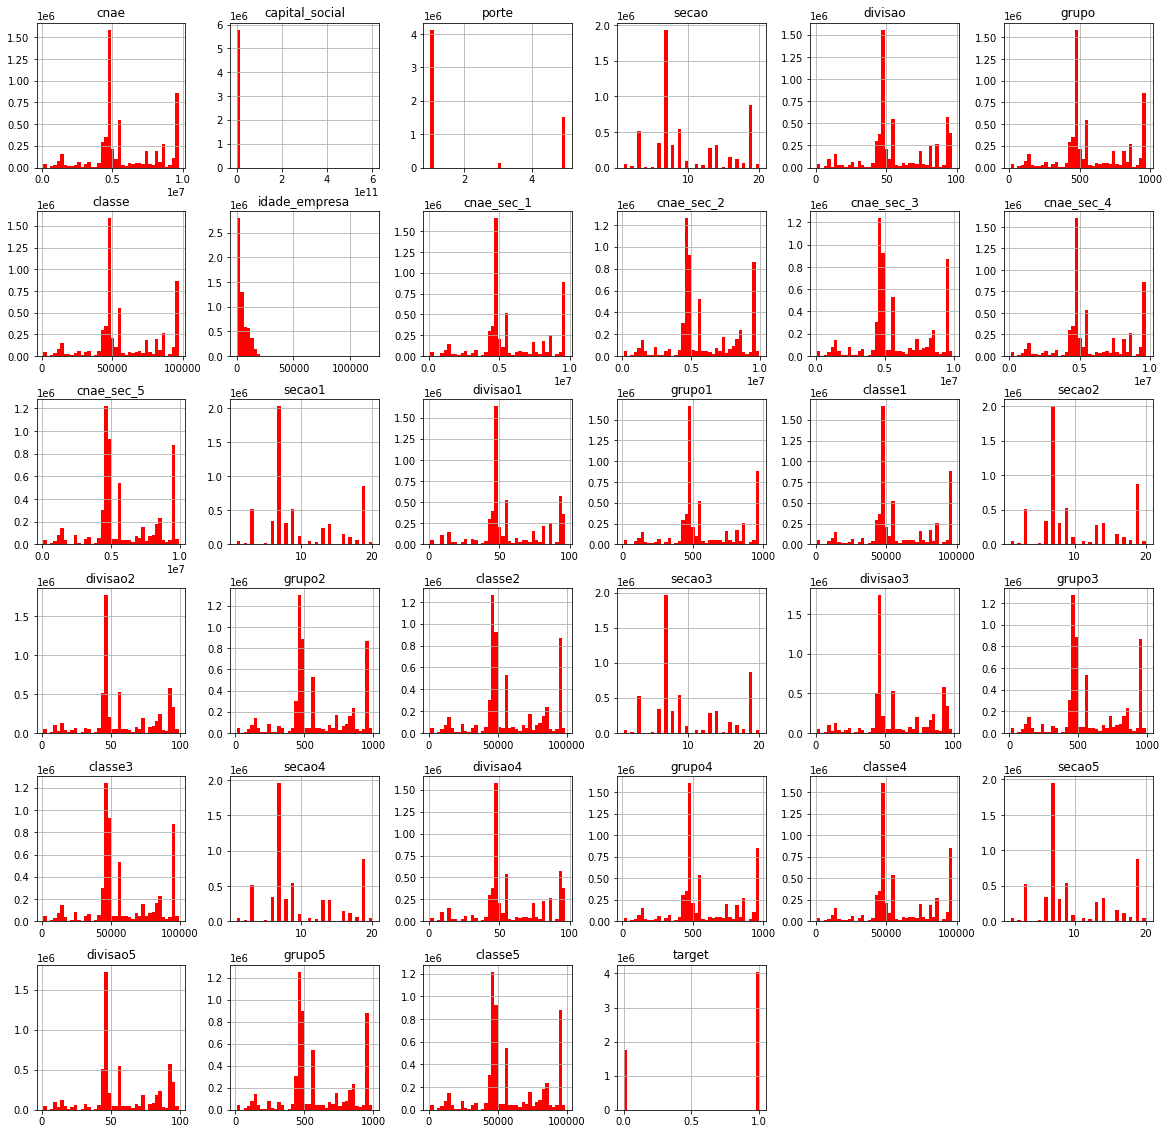

In [ ]:
df2.hist(bins = 40, figsize=(20,20), color = 'r');

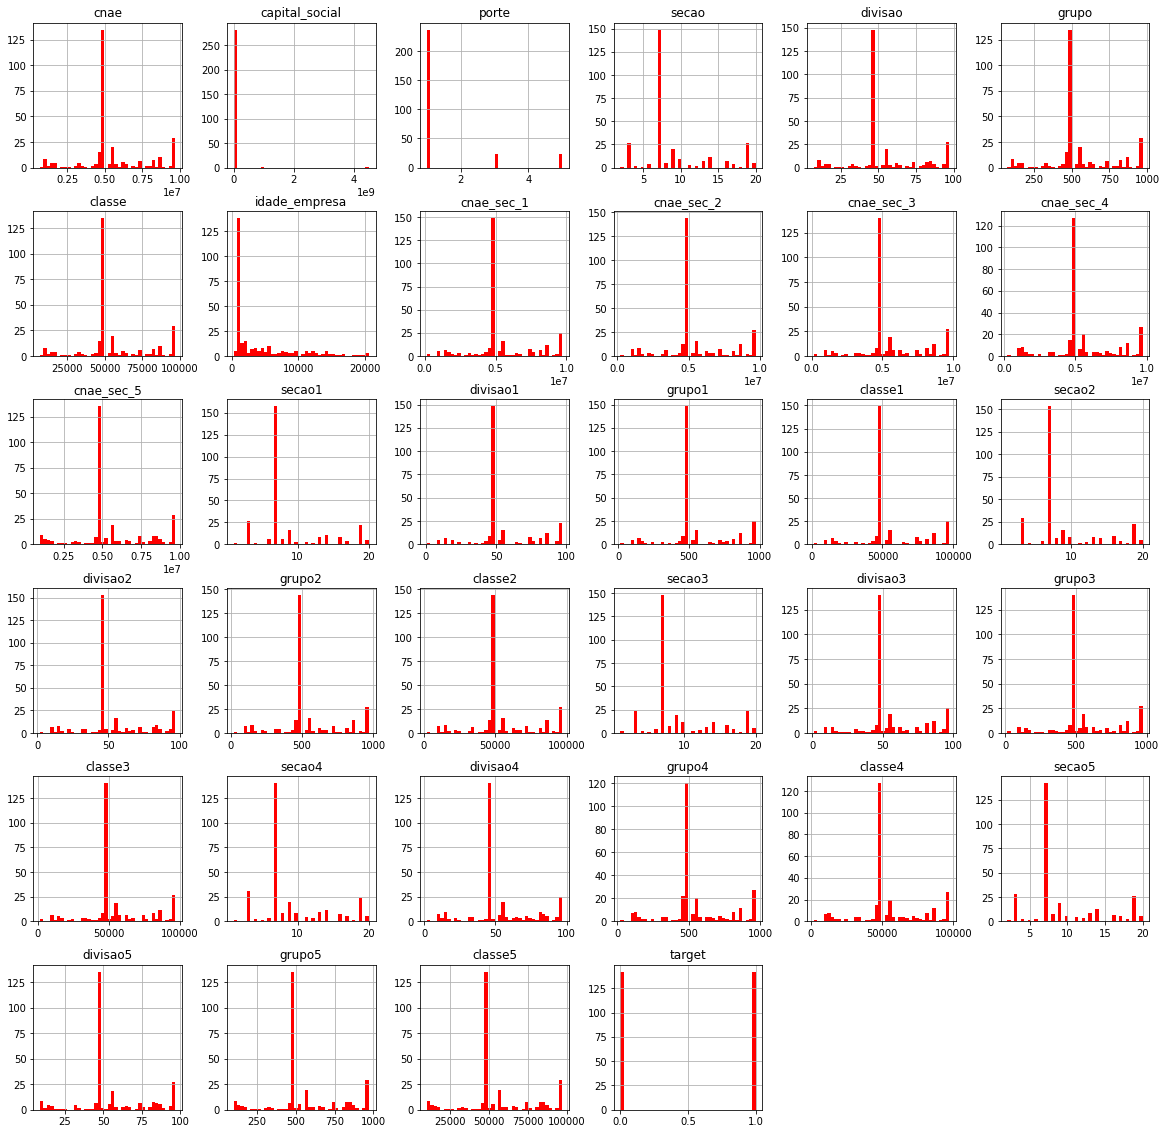

In [ ]:
base_treinamento.hist(bins = 40, figsize=(20,20), color = 'r');

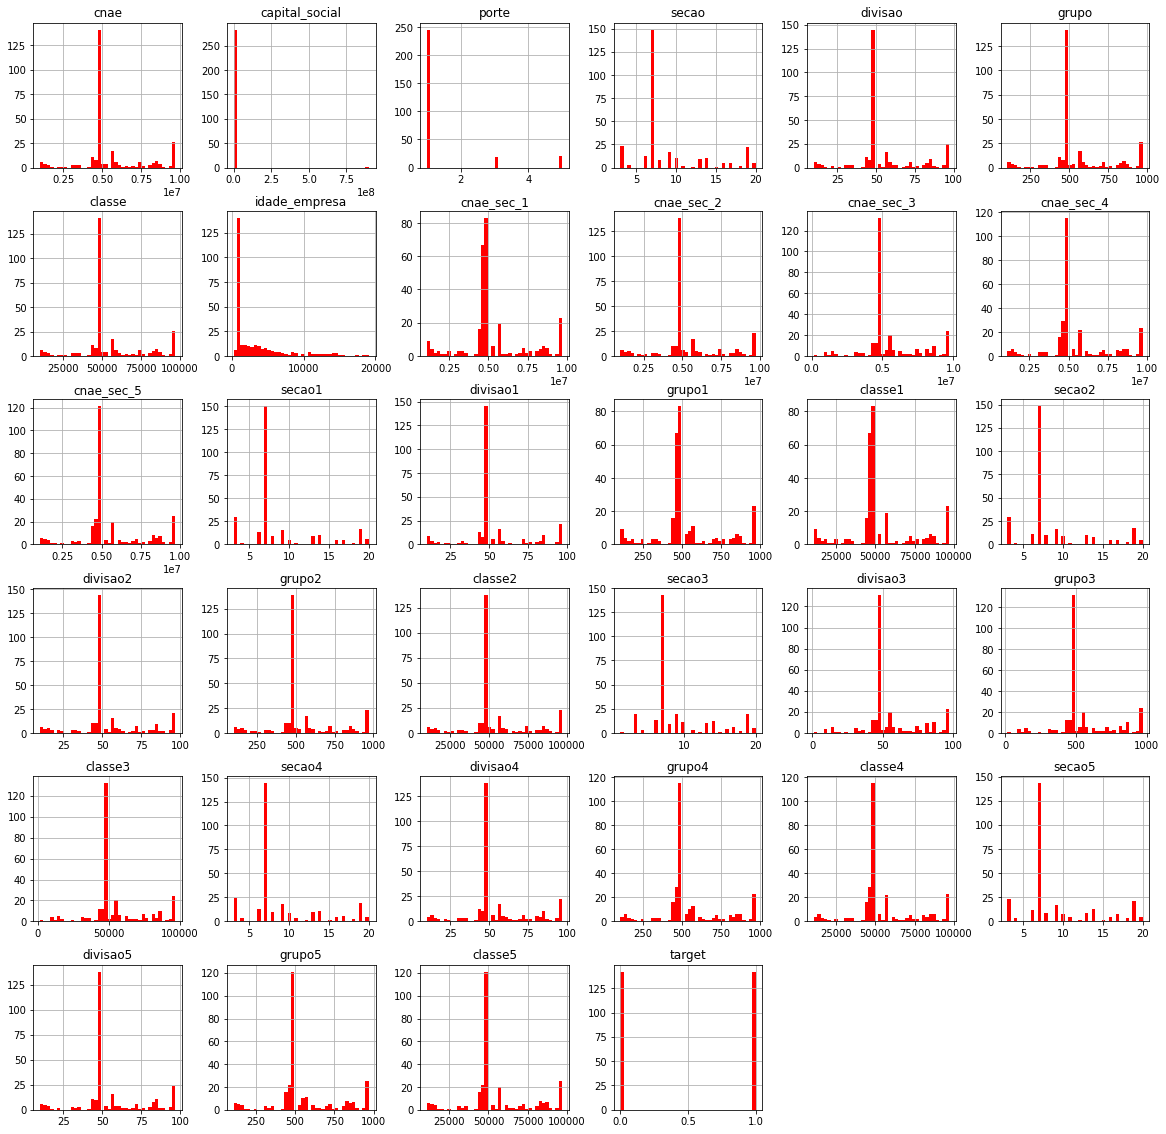

In [ ]:
base_teste.hist(bins = 40, figsize=(20,20), color = 'r');

In [ ]:
def plot_histogram(dataframe, x, y, color, width, height):
  fig = px.histogram(dataframe, x=x, y=y, color=color, width=width, 
                     height=height, color_discrete_sequence=['blue', 'red'])
  fig.update_layout(barmode='group', 
                    xaxis={'categoryorder': 'total descending'}, 
                    font=dict(size=12))
  fig.show()

In [ ]:
plot_histogram(df1, 'idade_empresa', None, 'target', 900, 500)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_histogram(base_treinamento, 'idade_empresa', None, 'target', 900, 500)

In [ ]:
plot_histogram(base_teste, 'idade_empresa', None, 'target', 900, 500)

In [ ]:
plot_histogram(base_treinamento, 'capital_social', None, 'target', 900, 500)

In [ ]:
plot_histogram(base_teste, 'idade_empresa', None, 'target', 900, 500)

## Dados de DF1 no treinamento

### Regressão logística

In [ ]:
logistic = LogisticRegression(verbose = 1, random_state= 1)
logistic.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(random_state=1, verbose=1)

In [ ]:
print('Training set score: {:.4f}'.format(logistic.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logistic.score(X_test, y_test)))

Training set score: 0.4896
Test set score: 0.4942


In [ ]:
y_pred = logistic.predict(X_test)

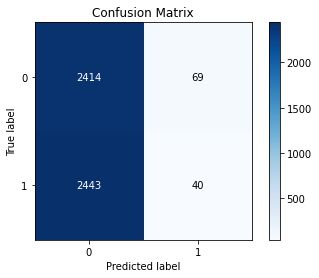

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.97      0.66      2483
           1       0.37      0.02      0.03      2483

    accuracy                           0.49      4966
   macro avg       0.43      0.49      0.34      4966
weighted avg       0.43      0.49      0.34      4966



#### Gridsearch RL

In [ ]:
grid=[
      {'C':np.logspace(-3,3,7), 'penalty':['l1', 'elasticnet', 'none'], 
       'solver':['newton-cg', 'lbfgs', 'sag', 'saga']} ,
      
      
      {'C':np.logspace(-3,3,7), 'penalty':['l2'], 'dual': [True, False],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
]  

In [ ]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid, cv = 10, scoring='f1_macro');
logreg_cv.fit(X_train,y_train);

A saída de streaming foi truncada nas últimas 5000 linhas.

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to co

In [ ]:
print("Tuned hyperparameters:(best parameters) ",logreg_cv.best_params_)
print("F1 scoring macro :",logreg_cv.best_score_)

Tuned hyperparameters:(best parameters)  {'C': 0.1, 'dual': False, 'penalty': 'l2', 'solver': 'newton-cg'}
F1 scoring macro : 0.6640079412000357


In [ ]:
y_pred = logreg_cv.predict(X_test)

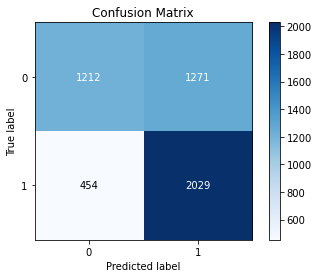

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.49      0.58      2483
           1       0.61      0.82      0.70      2483

    accuracy                           0.65      4966
   macro avg       0.67      0.65      0.64      4966
weighted avg       0.67      0.65      0.64      4966



### XGBoost

In [ ]:
modelo = XGBClassifier(colsample_bytree=0.8, gamma=1.5, 
                                     learning_rate=0.02, max_depth=5,
                                     n_estimators=600, nthread=1, silent=True, 
                                     subsample=0.6, random_state = 42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, cv=5)

In [ ]:
scores

array([0.69887834, 0.3431161 , 0.07596029, 0.46439361, 0.52524817])

In [ ]:
scores.mean(), scores.std()

(0.4215193026893915, 0.20740492386317907)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, scoring='f1_macro')

In [ ]:
scores

array([0.68814685, 0.33943348, 0.07556355, 0.39024053, 0.39686132])

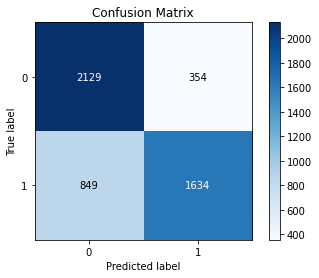

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78      2483
           1       0.82      0.66      0.73      2483

    accuracy                           0.76      4966
   macro avg       0.77      0.76      0.76      4966
weighted avg       0.77      0.76      0.76      4966



#### Gridsearch XGB

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=grid, n_iter=param_comb, 
                             scoring='f1_macro', n_jobs=4, 
                             cv=skf.split(X_train,y_train), 
                             verbose=3, random_state=1001)

start_time = timer(None) 
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 1 minutes and 50.43 seconds.


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([17.63988042, 31.29242984, 28.16157206, 18.39453292, 21.06691861]), 'std_fit_time': array([0.24032858, 0.36221071, 1.36175451, 0.16791145, 2.61988614]), 'mean_score_time': array([0.07435568, 0.41262007, 0.32217964, 0.15714367, 0.11811169]), 'std_score_time': array([0.0108018 , 0.11108269, 0.03092168, 0.01720306, 0.02016136]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

#### Feature Selection

### MLP

In [ ]:
X_train.shape

(11586, 33)

In [ ]:
neural_network = tf.keras.models.Sequential()

#input
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu', input_shape = (33,)))

# dense
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu')) 
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu')) 

# Output
neural_network.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid')) 
     

In [ ]:
neural_network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
neural_network.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
neural_network.fit(X_train, y_train, epochs= 200 )

Epoch 1/200
363/363 [==============================] - 2s 2ms/step - loss: 30730.9863 - accuracy: 0.5058
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 16015.1826 - accuracy: 0.5136
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 29415.9414 - accuracy: 0.5093
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 17850.4453 - accuracy: 0.5238
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 24685.4434 - accuracy: 0.5123
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 29899.7246 - accuracy: 0.5112
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 12694.6260 - accuracy: 0.5284
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 14272.9141 - accuracy: 0.5188
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 10031.5293 - accuracy: 0.5238
Epoch 10/200
363/363 [==============================] -

In [ ]:
y_pred = neural_network.predict(X_test)
y_pred

156/156 [==============================] - 0s 1ms/step


array([[0.5002072],
       [0.5002072],
       [0.5002072],
       ...,
       [0.5002072],
       [0.5002072],
       [0.5002072]], dtype=float32)

In [ ]:
y_pred = (y_pred >= 0.5)

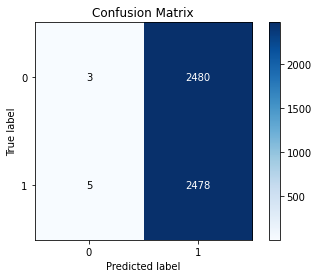

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.00      0.00      2483
           1       0.50      1.00      0.67      2483

    accuracy                           0.50      4966
   macro avg       0.44      0.50      0.33      4966
weighted avg       0.44      0.50      0.33      4966



#### MLP Gridsearch

In [ ]:
def Neural_network(n_neurons = 16,  activation_model = 'relu', 
                   optimizer_model  = 'Adam', 
                   loss_model = 'binary_crossentropy', 
                   activation_model_out = 'softmax'):

  # Build a sequential model
  neural_network = tf.keras.models.Sequential()

#-------------------------- Input Layer ----------------------------------------
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model, input_shape = (33,)))

#------------------------- Hidden Layer ----------------------------------------
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model))
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model))
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model))
  neural_network.add(tf.keras.layers.Dense(units = n_neurons, activation = activation_model))

#-------------------------- Output Layer ---------------------------------------
  neural_network.add(tf.keras.layers.Dense(units = 1, activation = activation_model_out))

#-------------------------- Compile ---------------------------------------
  neural_network.compile(optimizer  = optimizer_model, loss = loss_model, metrics = ['accuracy'])


  return neural_network

In [ ]:
grid_neural= [{'n_neurons':[15,16,17],  'activation_model':['identity','logistic', 'tanh’', 'relu'],
               'optimizer_model':['Adam', 'lbfgs', 'sgd'], 'loss_model':['binary_crossentropy'], 
               'activation_model_out':['relu','softmax', 'sigmoid']}]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 4)

model_neural = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = Neural_network, verbose=1)

neural_cv = GridSearchCV(model_neural, grid_neural, cv = 10, n_jobs = -1, scoring = 'f1_macro');
neural_cv.fit(X_train, y_train, groups=None, epochs= 1000, callbacks=callback); 

In [ ]:
print("Tuned hyperparameters:(best parameters) ",neural_cv.best_params_)
print("F1 score macro:",neural_cv.best_score_)

Tuned hyperparameters:(best parameters)  {'activation_model': 'relu', 'activation_model_out': 'relu', 'loss_model': 'binary_crossentropy', 'n_neurons': 16, 'optimizer_model': 'sgd'}
F1 score macro: 0.5584637969636356


In [ ]:
neural_network = tf.keras.models.Sequential()

#input
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu', input_shape = (33,)))

# dense
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu')) 
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu')) 
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu')) 
neural_network.add(tf.keras.layers.Dense(units= 16, activation = 'relu')) 

# Output
neural_network.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

In [ ]:
neural_network.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
neural_network.fit(X_train, y_train, epochs= 400)

In [ ]:
y_pred = neural_network.predict(X_test)

156/156 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
lista_de_tuplas = list(zip(y_pred, y_test))
df_pred = pd.DataFrame(lista_de_tuplas, columns=['y_pred', 'y_test'])
df_pred.head()

,y_pred,y_test
0,[nan],1
1,[nan],1
2,[nan],1
3,[nan],1
4,[nan],1


In [ ]:
plot_histogram(df_pred, 'y_pred', None, 'y_test', 900, 500)

In [ ]:
y_pred = (y_pred <= 0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
df_pred.y_pred.value_counts()

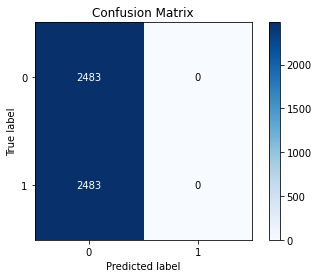

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2483
           1       0.50      1.00      0.67      2483

    accuracy                           0.50      4966
   macro avg       0.25      0.50      0.33      4966
weighted avg       0.25      0.50      0.33      4966



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### hyperopt-sklearn

In [ ]:
!pip install hpsklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 5.2 MB/s eta 0:00:00
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23913 sha256=315aa1c7381f9ae9d290a43b8218b76b314a69c83435fb6e1f9ac6a0d05b2358
  Stored in directory: /root/.cache/pip/wheels/ed/78/df/b51d66188f755e2c237b6bcbe8f0ed408e2508eb648814d6fb
Successfully built hpsklearn


In [ ]:
from hpsklearn import HyperoptEstimator, any_classifier
from hyperopt import tpe

In [ ]:
estim = HyperoptEstimator()

estim.fit(X_train.to_numpy(), y_train.to_numpy())

100%|██████████| 1/1 [00:02<00:00,  2.05s/it, best loss: 0.32700603968938735]


In [ ]:
print(estim.best_model())

{'learner': KNeighborsClassifier(metric='manhattan', n_jobs=1, n_neighbors=2, p=1), 'preprocs': (PCA(n_components=32),), 'ex_preprocs': ()}


In [ ]:
prediction = estim.predict(X_test)

score = estim.score(X_test, y_test)

model = estim.best_model()

In [ ]:
model

{'learner': KNeighborsClassifier(metric='manhattan', n_jobs=1, n_neighbors=2, p=1),
 'preprocs': (PCA(n_components=32),),
 'ex_preprocs': ()}

In [ ]:
from hpsklearn import HyperoptEstimator, random_forest, svc, knn
from hyperopt import hp

clf = hp.pchoice( 'my_name', 
          [ ( 0.4, random_forest('my_name.random_forest') ),
            ( 0.3, svc('my_name.svc') ),
            ( 0.3, knn('my_name.knn') ) ])

estim = HyperoptEstimator(classifier=clf)

In [ ]:
estim.fit(X_train.to_numpy(), y_train.to_numpy())

100%|██████████| 1/1 [00:05<00:00,  5.48s/it, best loss: 0.3727351164797239]


In [ ]:
print(estim.best_model())

{'learner': RandomForestClassifier(criterion='entropy', max_depth=4,
                       max_features=0.6490183771774795, min_samples_leaf=6,
                       n_estimators=611, n_jobs=1, random_state=4,
                       verbose=False), 'preprocs': (Normalizer(norm='l1'),), 'ex_preprocs': ()}


### random forest

In [ ]:
model = RandomForestClassifier(criterion= 'entropy', n_estimators= 180, oob_score= True, warm_start= True)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=180, oob_score=True,
                       warm_start=True)

In [ ]:
y_pred = model.predict(X_test)

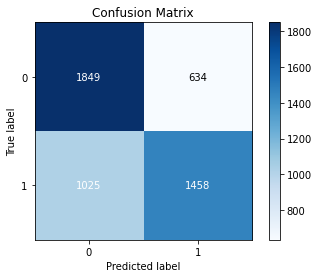

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      2483
           1       0.70      0.59      0.64      2483

    accuracy                           0.67      4966
   macro avg       0.67      0.67      0.66      4966
weighted avg       0.67      0.67      0.66      4966



#### Gridsearch RF

In [ ]:
grid_forest =[
      { 'criterion': ['gini', 'entropy'],
        'n_estimators' : list(range(50,500,10)),
        'oob_score': [True, False],
        'warm_start': [True, False],
      } ,
]

In [ ]:
forest = RandomForestClassifier()
forest_cv=GridSearchCV(forest,grid_forest, cv = 10, scoring='f1_macro');
forest_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                           130, 140, 150, 160, 170, 180, 190,
                                           200, 210, 220, 230, 240, 250, 260,
                                           270, 280, 290, 300, 310, 320, 330,
                                           340, ...],
                          'oob_score': [True, False],
                          'warm_start': [True, False]}],
             scoring='f1_macro')

In [ ]:
print("Tuned hyperparameters:(best parameters) ",forest_cv.best_params_)
print("F1 score macro: ",forest_cv.best_score_)

Tuned hyperparameters:(best parameters)  {'criterion': 'entropy', 'n_estimators': 180, 'oob_score': True, 'warm_start': True}
F1 score macro:  0.5924231353287166


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(metric='manhattan', n_jobs=1, n_neighbors=2, p=1)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=1, n_neighbors=2, p=1)

In [ ]:
y_pred = neigh.predict(X_test)

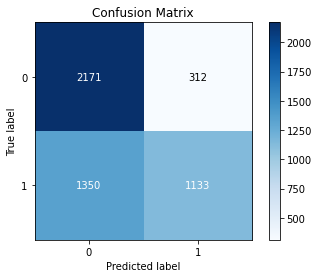

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72      2483
           1       0.78      0.46      0.58      2483

    accuracy                           0.67      4966
   macro avg       0.70      0.67      0.65      4966
weighted avg       0.70      0.67      0.65      4966



### SVM

In [ ]:
svm = SVC(C = 100, decision_function_shape = 'ovo', kernel = 'rbf', random_state = 1,)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)

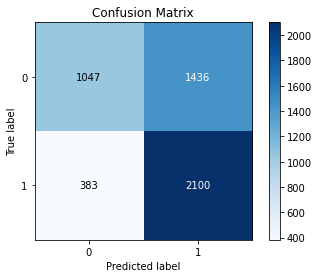

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.42      0.54      2483
           1       0.59      0.85      0.70      2483

    accuracy                           0.63      4966
   macro avg       0.66      0.63      0.62      4966
weighted avg       0.66      0.63      0.62      4966



#### Gridsearch SVM

In [ ]:
grid_svm =[
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'decision_function_shape' : ['ovo', 'ovr'],},

  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly', 'rbf', 'sigmoid'],
   'decision_function_shape' : ['ovo', 'ovr'],},
]

In [ ]:
svm = SVC()
svm_cv=GridSearchCV(svm,grid_svm, cv = 10, scoring='f1_macro');
svm_cv.fit(X_train, y_train)

In [ ]:
print("Tuned hyperparameters:(best parameters) ",svm_cv.best_params_)
print("F1 score macro :",svm_cv.best_score_)

### LightGBM

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=250, n_jobs=-1, num_leaves=110, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
clf.fit(X_train, y_train)

LGBMClassifier(max_depth=3, n_estimators=250, num_leaves=110, random_state=123,
               silent='warn')

In [ ]:
y_pred=clf.predict(X_test)

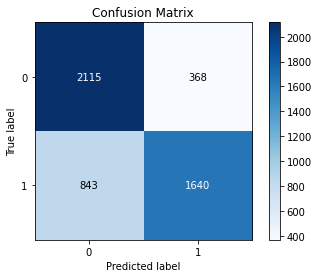

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2483
           1       0.82      0.66      0.73      2483

    accuracy                           0.76      4966
   macro avg       0.77      0.76      0.75      4966
weighted avg       0.77      0.76      0.75      4966



## Dados de DF2 no treinamento

### Regressão logística

In [ ]:
logistic = LogisticRegression(verbose = 1, random_state= 1)
logistic.fit(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(random_state=1, verbose=1)

In [ ]:
print('Training set score: {:.4f}'.format(logistic.score(X_test, y_test)))

print('Test set score: {:.4f}'.format(logistic.score(X_train, y_train)))

Training set score: 0.8662
Test set score: 0.8486


In [ ]:
y_pred = logistic.predict(X_train)

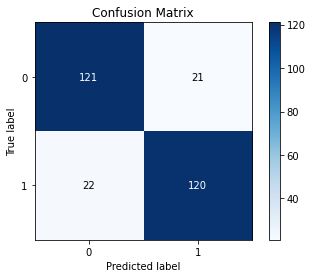

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       142
           1       0.85      0.85      0.85       142

    accuracy                           0.85       284
   macro avg       0.85      0.85      0.85       284
weighted avg       0.85      0.85      0.85       284



### XGBoost

In [ ]:
modelo = XGBClassifier(scale_pos_weight=1, random_state = 42)
modelo.fit(X_test, y_test)

y_pred = modelo.predict(X_train)

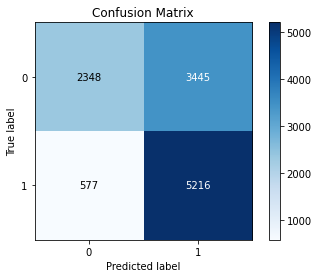

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.41      0.54      5793
           1       0.60      0.90      0.72      5793

    accuracy                           0.65     11586
   macro avg       0.70      0.65      0.63     11586
weighted avg       0.70      0.65      0.63     11586



## SHAP

In [ ]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)
np.abs(shap_values.sum(1) + explainer.expected_value - y_pred).max()

6.171628952026367

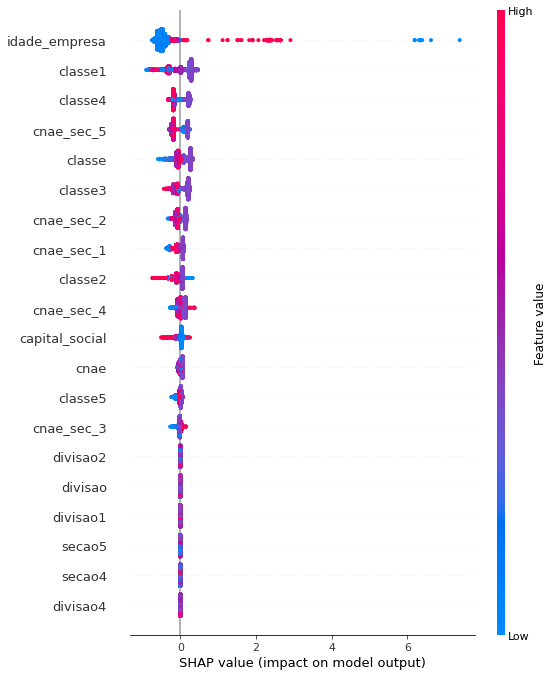

In [ ]:
shap.summary_plot(shap_values, X_test)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV

In [ ]:
len(X_train.columns)

33

In [ ]:
selector1 = SelectKBest(chi2, k =15)
X_new1 = selector1.fit_transform(X_train, y_train)
lista1 = list(X_train.columns[selector1.get_support()])
lista1

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'grupo',
 'grupo5']

In [ ]:
len(lista1)

15

In [ ]:
rfe_selector = RFE(estimator= XGBClassifier(),n_features_to_select = 15, step = 1)
X_new2= rfe_selector.fit(X_train, y_train)
lista2 = list(X_train.columns[rfe_selector.get_support()])
lista2

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'grupo5',
 'idade_empresa']

In [ ]:
sfm_selector = SelectFromModel(estimator=XGBClassifier(max_features='log2'))
X_new3 = sfm_selector.fit(X_train, y_train)
lista3 = list(X_train.columns[sfm_selector.get_support()])
lista3

['classe',
 'classe1',
 'classe3',
 'classe4',
 'classe5',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_5',
 'idade_empresa']

In [ ]:
list_total = lista1 + lista2 + lista3

In [ ]:
def count_element_list(list_input, Name_second_column = 'Numbers'):
  """
  Função que conta os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from collections import Counter

 
  counting_features = dict(Counter(list_input))

  sorted_dict = {}
  sorted_keys = sorted(counting_features, key = counting_features.get, reverse = True) 

  for w in sorted_keys:
      sorted_dict[w] = counting_features[w]

  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])
  
  return df


def enumerate_position(list_input):
  """
  função que enumera os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from itertools import count
  indice = count() 
  dic = {k:next(indice)+1 for k in list_input}

  sorted_dict = {}
  sorted_keys = sorted(list_input, key = dic.get, reverse = False) 

  for w in sorted_keys:
    sorted_dict[w] = dic[w]
  
  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features','Position'])

  return df


def sort_dict_key(dictionary, reverse_order = False, Name_second_column = None):
  """
  Função para classificar um dicionário por uma chave. A saída é um DataFrame
  """
  sorted_dict = {}
  sorted_keys = sorted(dictionary, key = dictionary.get, reverse = reverse_order) 

  for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
    df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])

  return df

In [ ]:
df_count_numbers = count_element_list(list_total)

In [ ]:
df_list1_enum = enumerate_position(lista1)
df_list2_enum = enumerate_position(lista2)
df_list3_enum = enumerate_position(lista3)
frames = [df_list1_enum , df_list2_enum , df_list3_enum ]
result = pd.concat(frames)

all_features_select = list(result['Features'].unique())

position = dict()
for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

df_top_position = sort_dict_key(position, reverse_order= False, Name_second_column= 'Top position')

In [ ]:
column_final = []
for i in df_top_position['Features']:
  a = int(df_count_numbers[ df_count_numbers['Features'] == i ].iloc[:,1])
  column_final.append(a)

df_top_position['Times that appears'] = column_final
df_top_position

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,2.666667,3
3,classe2,4.000000,2
4,classe3,4.333333,3
5,classe4,5.333333,3
6,classe5,6.333333,3
7,cnae,8.000000,2
8,cnae_sec_1,8.000000,3
9,cnae_sec_2,9.000000,3


In [ ]:
df_top_position.sort_values(["Times that appears", "Features"], ascending=True)

,Features,Top position,Times that appears
14,grupo,14.000000,1
0,capital_social,1.000000,2
3,classe2,4.000000,2
7,cnae,8.000000,2
10,cnae_sec_3,11.000000,2
12,cnae_sec_4,12.000000,2
15,grupo5,14.500000,2
13,idade_empresa,12.000000,2
1,classe,1.666667,3
2,classe1,2.666667,3


In [ ]:
selection1 = df_top_position.iloc[:, :] 
selection2 = selection1[ selection1['Times that appears'] >= 2]
selection2

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,2.666667,3
3,classe2,4.000000,2
4,classe3,4.333333,3
5,classe4,5.333333,3
6,classe5,6.333333,3
7,cnae,8.000000,2
8,cnae_sec_1,8.000000,3
9,cnae_sec_2,9.000000,3


In [ ]:
features_selected = []
for w in selection2['Features']:
  features_selected.append(w)
features_selected, len(features_selected)

(['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_5',
  'cnae_sec_4',
  'idade_empresa',
  'grupo5'],
 15)

## Testando modelo com Feature Selection

In [ ]:
X_train = X_train[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_5',
  'cnae_sec_4',
  'idade_empresa',
  'grupo5']]
X_test = X_test[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_5',
  'cnae_sec_4',
  'idade_empresa',
  'grupo5']]

In [ ]:
X_train.head()

,capital_social,classe,classe1,classe2,classe3,classe4,classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_5,cnae_sec_4,idade_empresa,grupo5
0,90000.0,47717,47211,47237,47296,47610,47717,4771701,4721104,4723700,4729699,4771703,4761002,762,477
1,0.0,47717,47717,47717,47717,47717,47717,4771701,4771701,4771701,4771701,4771701,4771701,7600,477
2,40000.0,47717,47725,47717,47717,47717,47717,4771701,4772500,4771701,4771701,4771701,4771701,7509,477
3,45000.0,47717,47610,47725,47211,47296,46192,4771701,4761003,4772500,4721104,4619200,4729699,8964,461
4,5000.0,47717,47717,47717,47717,47717,47717,4771701,4771701,4771701,4771701,4771701,4771701,14448,477


In [ ]:
X_train.shape

(11586, 15)

In [ ]:
modelo = XGBClassifier(random_state = 42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

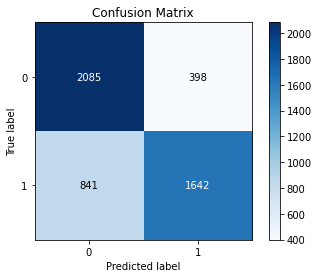

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2483
           1       0.80      0.66      0.73      2483

    accuracy                           0.75      4966
   macro avg       0.76      0.75      0.75      4966
weighted avg       0.76      0.75      0.75      4966

